# Men's Basketball

<img src='mens_basketball.jpg'/>

Basketball is a team sport in which two teams, usually of five players each, battle on a rectangular court with the primary goal of shooting a basketball through the opposing team's hoop while preventing the opposing team from shooting through their own hoop. It is one of the most high-scoring major sports.

In terms of popularity, wages, talent, and level of competition, the National Basketball Association (NBA) is the world's most significant professional basketball league. 


NBA games are forty-eight minutes long, divided into four twelve-minute quarters. The game clock, however, stops for a variety of reasons within that forty-eight-minute period, including fouls, intermission, and time-outs. As a result, an average NBA game during the regular season may last two to two and a half hours, while game length during the playoffs and finals may exceed three hours.


The NBA playoffs is a best-of-seven elimination competition between sixteen teams from the Eastern and Western Conferences, with the final four teams advancing to the conference finals. Following the conference finals, the winners of the West and East conferences compete for the NBA championship.

# Problem Statement

This notebook aims to explore the most essential regular season metrics that contribute to a team's chances of making the NBA playoffs finals.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',80)

# 2. Inspect Data

In [2]:
master = pd.read_csv('data/basketball_master.csv')
teams = pd.read_csv('data/basketball_teams.csv')
coaches = pd.read_csv('data/basketball_coaches.csv')
series_post = pd.read_csv('data/basketball_series_post.csv')
abbrev = pd.read_csv('data/basketball_abbrev.csv')
awards_coaches = pd.read_csv('data/basketball_awards_coaches.csv')
awards_players = pd.read_csv('data/basketball_awards_players.csv')
draft = pd.read_csv('data/basketball_draft.csv')
hof = pd.read_csv('data/basketball_hof.csv')
player_allstar = pd.read_csv('data/basketball_player_allstar.csv')

## Data Description

- **master**: biographical information for all the players and coaches
- **teams**: stats on each team, per year
- **coaches**: stats for each coach, per year
- **series_post**: information on post-season winners, per year
- **abbrev**: a key to the abbreviations used in other tables
- **awards_coaches**: coaching awards, per year
- **awards_players**: player awards, per year
- **draft**: draft information, per year
- **hof**: Hall of Fame information, per year
- **player_allstar**: individual player stats for the All-Star Game, per year

In [3]:
teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,o_tmRebound,d_tmRebound,homeWon,homeLost,awayWon,awayLost,neutWon,neutLoss,confWon,confLoss,divWon,divLoss,pace,won,lost,games,min,arena,attendance,bbtmID
0,1946,NBA,BOS,BOS,NaN,ED,5,0,NaN,Boston Celtics,1397,5133,811,1375,0,0,0,0,0,470,1202,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3898,0,0,14,16,8,22,0,0,0,0,11,19,0,22,38,60,14500.0,Boston Garden,32767,BOS
1,1946,NBA,CHS,CHS,NaN,WD,1,0,F,Chicago Stags,1879,6309,939,1550,0,0,0,0,0,436,1473,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4473,0,0,22,9,17,13,0,0,0,0,17,8,0,39,22,61,14840.0,Chicago Stadium,0,CHS
2,1946,NBA,CLR,CLR,NaN,WD,3,0,R1,Cleveland Rebels,1674,5699,903,1428,0,0,0,0,0,494,1246,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0,0,17,13,13,17,0,0,0,0,10,14,0,30,30,60,14600.0,Cleveland Arena,0,CLR
3,1946,NBA,DTF,DTF,NaN,WD,4,0,NaN,Detroit Falcons,1437,5843,923,1494,0,0,0,0,0,482,1351,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3917,0,0,12,18,8,22,0,0,0,0,8,16,0,20,40,60,14600.0,Detroit Olympia,0,DTF
4,1946,NBA,NYK,NYK,NaN,ED,3,0,SF,New York Knicks,1465,5255,951,1438,0,0,0,0,0,457,1218,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3842,0,0,18,12,15,15,0,0,0,0,13,17,0,33,27,60,14575.0,Madison Square Garden (III),32767,NYK


- **lgID** - the league in which a team participated in a particular year
- **tmID** - a unique identifier for each team in the dataset
- **franchID** - the team's current franchise. **Philadelphia Warriors (PHW)**, for example, relocated to San Francisco in 1962 and became San Francisco Warriors until 1971, when its name was changed to **Golden State Warriors (GSW)**    
- **confID** - the conference in which a team belongs
- **divID** - the division in which a team belongs
- **rank** - a team's rank in its division
- **confRank** - a team's rank in its conference
- **playoff** - indicates how far a team went in the playoffs
- **o_fgm** - overall field goals made
- **o_fga** - overall field goals attempted
- **o_ftm** - overall free throws made
- **o_fta** - overall field throws attempted
- **o_3pm** - overall 3-pointers made
- **o_3pa** - overall 3-pointers attempted
- **o_oreb** - overall offensive rebounds
- **o_dreb** - overall defensive rebounds
- **o_reb** - overall rebounds
- **o_asts** - overall assists
- **o_pf** - overall personal fouls
- **o_stl** - overall steals
- **o_to** - overall turnovers
- **o_blk** - overall blocks
- **o_pts** - overall points
- **d_fgm** - field goals made by opponents 
- **d_fga** - field goals attempted by opponents
- **d_ftm** - free throws made by opponents
- **d_fta** - field throws attempted by opponents
- **d_3pm** - 3-pointers made by opponents
- **d_3pa** - 3-pointers attempted by opponents
- **d_oreb** - opponents' offensive rebounds 
- **d_dreb** - opponents' defensive rebounds
- **d_reb** - opponents' overall rebounds
- **d_asts** - opponents' assists
- **d_pf** - opponents' personal fouls
- **d_stl** - opponents' steals
- **d_to** - opponents' turnovers
- **d_blk** - opponents' blocks
- **d_pts** - opponents' points
- **o_tmRebound** - overall team rebounds
- **d_tmRebound** - opponents' team rebounds
- **homeWon** - number of home games won
- **homeLost** - number of home games lost
- **awayWon** - number of away games won
- **awayLost** - number of away games lost
- **neutWon** - number of wins on neutral grounds
- **neutLoss** - number of losses on neutral grounds,
- **confWon** - number of conference games won
- **confLoss** - number of conference games lost
- **divWon** - number of division games won
- **divLoss** - number of division games lost
- **pace** - number of possessions per 48 minutes 
- **won** - total games won
- **lost** - total games lost
- **games** - total games played
- **min** - total minutes played
- **arena** - team's home ground 

Let's give the columns consistent and descriptive names

In [4]:
teams.columns = ['year', 'lg_id', 'tm_id', 'franch_id', 'conf_id', 'div_id', 'div_rank',
       'conf_rank', 'playoff', 'name', 'fg_made', 'fg_attempts', 'ft_made', 'ft_attempts',
       'treys_made', 'treys_attempts', 'off_reb', 'def_reb', 'reb', 'assists', 'fouls',
       'steals', 'turnovers', 'blocks', 'points', 'opp_fg_made', 'opp_fg_attempts', 
       'opp_ft_made', 'opp_ft_attempts','opp_treys_made', 'opp_treys_attempts', 'opp_off_reb',
       'opp_def_reb', 'opp_reb', 'opp_assists', 'opp_fouls', 'opp_steals', 'opp_turnovers',
       'opp_blocks', 'opp_points', 'tm_reb', 'opp_tm_reb', 'home_wins', 'home_losses', 
       'away_wins', 'away_losses', 'net_wins', 'net_losses', 'conf_wins', 'conf_losses', 
       'div_wins', 'div_losses', 'pace', 'tot_wins', 'tot_losses','games_played', 'mins_played',
       'home_ground', 'attendance', 'bbtm_id']

In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1536 non-null   int64  
 1   lg_id               1536 non-null   object 
 2   tm_id               1536 non-null   object 
 3   franch_id           1536 non-null   object 
 4   conf_id             1064 non-null   object 
 5   div_id              1498 non-null   object 
 6   div_rank            1536 non-null   int64  
 7   conf_rank           1536 non-null   int64  
 8   playoff             901 non-null    object 
 9   name                1536 non-null   object 
 10  fg_made             1536 non-null   int64  
 11  fg_attempts         1536 non-null   int64  
 12  ft_made             1536 non-null   int64  
 13  ft_attempts         1536 non-null   int64  
 14  treys_made          1536 non-null   int64  
 15  treys_attempts      1536 non-null   int64  
 16  off_re

- There are **1536 rows** and **60 columns** in the dataset
- Most of the columns are numeric
- There are not too many missing values. **playoff** has almost **50 percent** missing values. This is reasonable because only **16 teams** participate in the tournament.

In [6]:
teams.describe()

,year,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1322.000000,1536.000000
mean,1981.472656,3.346354,4.397135,2920.631510,6363.819010,1572.903646,2093.155599,194.324870,563.151042,741.756510,1677.847005,3299.985677,1659.423177,1725.720052,452.635417,960.897786,278.067708,7623.557292,2428.643229,5239.662109,1246.173828,243.814453,525.278646,1639.120443,741.756510,1677.847005,2686.380208,1413.337240,1418.064453,452.635417,960.897786,278.067708,7623.422526,59.255208,6.106771,21.361328,12.610677,12.609375,21.363281,1.081380,1.083333,16.682292,16.682292,11.761068,11.763672,5.529297,37.552734,37.557943,70.618490,19148.793495,25710.521484
std,20.123185,1.773812,4.555967,901.436961,2111.758438,476.075297,670.675615,212.856804,585.410835,520.660237,1139.579799,1336.302511,600.846118,567.692912,325.460652,628.799610,205.152812,2213.809270,1435.128608,3075.981633,748.413908,363.634204,540.061639,995.783888,517.685239,1140.484083,1583.100044,843.209954,834.439558,323.010733,629.799579,200.203325,2213.479498,181.357020,62.627291,9.846326,7.661367,7.446033,9.429432,2.680953,2.826277,14.477500,14.473945,7.765761,7.742737,22.181582,14.166431,14.074785,23.965236,2020.620665,13469.406103
min,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2640.000000,0.000000
25%,1968.000000,2.000000,0.000000,2839.750000,6410.500000,1455.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,3317.750000,1579.000000,1703.750000,0.000000,0.000000,0.000000,7620.500000,1596.500000,3785.500000,802.000000,0.000000,0.000000,1074.500000,0.000000,0.000000,1987.250000,936.500000,1029.250000,0.000000,0.000000,0.000000,7572.000000,0.000000,0.000000,15.000000,7.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000,28.000000,28.000000,75.000000,19730.000000,32767.000000
50%,1984.000000,3.000000,3.000000,3169.500000,6894.500000,1639.000000,2191.500000,106.000000,352.500000,962.000000,2356.000000,3526.000000,1818.500000,1875.500000,597.000000,1215.000000,352.500000,8321.500000,3071.500000,6710.500000,1554.500000,118.000000,376.000000,2056.500000,970.000000,2336.000000,3423.000000,1793.000000,1818.000000,611.500000,1217.000000,368.000000,8357.000000,0.000000,0.000000,23.000000,12.000000,12.000000,23.000000,0.000000,0.000000,19.000000,19.000000,12.000000,12.000000,0.000000,39.000000,38.000000,82.000000,19780.000000,32767.000000
75%,1999.000000,5.000000,8.000000,3504.000000,7471.000000,1861.500000,2472.000000,363.000000,1060.000000,1138.250000,2499.000000,3817.250000,2021.250000,2038.000000,699.250000,1

- The data contains teams statistics between **1937** and **2011**
- The highest number of points accumulated by a team over these years is **10,371** while the highest number of points conceded is **10,723**
- The highest number of wins by a team over these years is **72** while the highest number of losses is **73**
- The highest number of minutes played by a team over these years is **20,460** while the lowest number of minutes is **2,640**

# 3. Data Exploration

## Leagues

What are the unique basketball leagues in the dataset?

In [7]:
teams.lg_id.unique()

array(['NBA', 'ABA', 'ABL1', 'NPBL', 'NBL', 'PBLA'], dtype=object)

How many unique teams have participated in each league over the years?

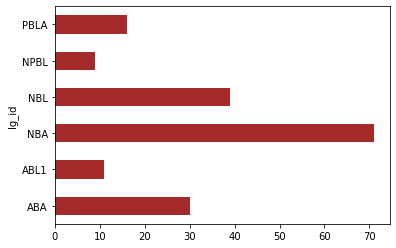

In [8]:
(teams.groupby('lg_id').tm_id.nunique()).plot.barh(color='brown');

Most teams in the dataset participated in **NBA**. The rest of this notebook will focus on the NBA

In [9]:
nba_df = teams[teams.lg_id=='NBA']

In [10]:
nba_df.describe()

,year,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.00000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1214.000000,1304.000000
mean,1986.043712,3.359663,5.179448,3113.470092,6883.472393,1665.045245,2227.427147,218.985429,629.649540,821.064417,1874.687883,3554.744632,1821.088957,1865.732362,517.186350,1023.067485,318.474693,8110.970859,2605.380368,5612.307515,1328.318252,277.13727,589.673313,1745.142638,821.064417,1874.687883,2861.329755,1540.506902,1520.813650,517.186350,1023.067485,318.474693,8110.812117,68.705521,7.193252,22.443252,13.394172,13.391871,22.444785,1.110429,1.112730,19.650307,19.650307,12.322853,12.325920,6.513037,39.591258,39.597393,73.897239,19184.155684,29048.046012
std,17.491243,1.776092,4.516365,546.108032,909.674738,292.366356,384.449769,219.709497,602.499287,466.917059,1025.986839,947.739366,342.857765,254.527159,293.525248,581.478160,187.471140,1256.025830,1293.849664,2749.915283,670.482027,384.29584,555.191476,890.508605,463.145025,1027.026438,1402.191574,770.366825,751.577862,290.630389,582.929518,181.244235,1257.741099,195.012326,67.916879,9.261023,7.515315,7.263422,8.852766,2.805556,2.990703,13.731348,13.726932,6.511993,6.477216,23.941919,12.523903,12.481564,21.324346,1747.536874,10397.656176
min,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,0.000000,3360.000000,0.000000
25%,1974.750000,2.000000,0.000000,2918.750000,6509.750000,1499.000000,2001.500000,0.000000,0.000000,714.250000,1947.000000,3364.000000,1675.000000,1745.000000,459.500000,920.250000,262.750000,7819.000000,2718.250000,6229.750000,1302.000000,0.00000,0.000000,1606.250000,715.750000,1941.500000,3149.750000,1547.750000,1617.250000,477.750000,903.500000,284.500000,7796.500000,0.000000,0.000000,17.750000,8.000000,8.000000,18.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,0.000000,30.000000,30.000000,82.000000,19730.000000,32767.000000
50%,1989.000000,3.000000,5.000000,3203.000000,6920.000000,1653.000000,2210.500000,154.500000,480.000000,997.000000,2381.000000,3533.000000,1860.500000,1884.000000,625.000000,1227.000000,375.500000,8356.000000,3096.000000,6740.500000,1570.500000,172.50000,462.000000,2084.000000,1007.000000,2366.000000,3434.500000,1835.000000,1828.500000,633.000000,1230.000000,386.000000,8417.000000,0.000000,0.000000,24.000000,13.000000,13.000000,23.000000,0.000000,0.000000,22.000000,21.000000,12.000000,12.000000,0.000000,40.000000,39.000000,82.000000,19780.000000,32767.000000
75%,2001.000000,5.000000,9.000000,3504.000000,7423.250000,1846.000000,2460.500000,407.250000,1160.000000,1143.000000,2505.250000,3769.000000,2049.000000,2033

The nba data consists of records between 1946 and 2011

Let's create a copy of the nba dataset for exploration

In [11]:
nba = nba_df.copy()

## NBA Teams

How many unique teams are in the nba dataset?

In [12]:
nba.tm_id.nunique()

71

## NBA Franchises

How many unique franchises are in the nba dataset?

In [13]:
nba.franch_id.nunique()

45

There are more teams than franchises. This is because many teams have changed their names over the years.
  
Which nba teams changed their names?

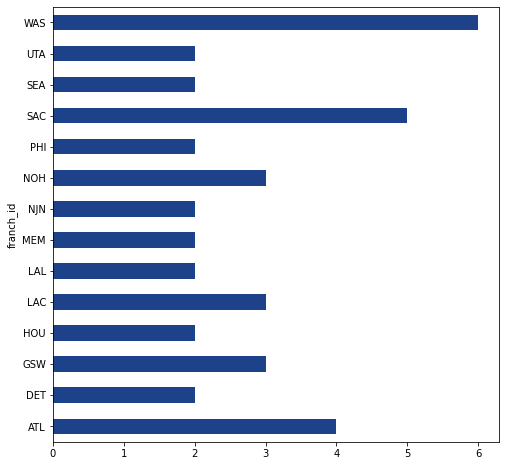

In [14]:
plt.figure(figsize=(8,8))
franch = nba.groupby('franch_id').tm_id.nunique()
(franch[franch>1]).plot.barh(color='#1d428a');

In [15]:
nba[nba.franch_id=='WAS'].tm_id.unique()

array(['CHP', 'CHZ', 'BAL', 'CAP', 'WSB', 'WAS'], dtype=object)

**Washington Wizards (WAS)** changed their team name 6 times. From **Chicago Packers (CHP)** to **Chicago Zephyrs (CHZ)** to **Baltimore Bullets (BAL)** to **Capital Bullets (CAP)** to **Washington Bullets (WSB)** to what they currently are

## NBA Conferences and Divisions

How many conferences are in the NBA?

In [16]:
nba.conf_id.value_counts()

WC    533
EC    531
Name: conf_id, dtype: int64

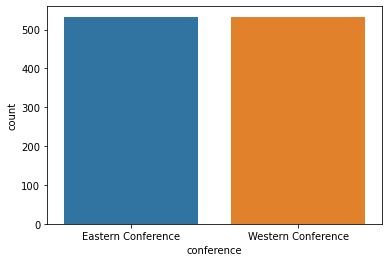

In [17]:
conf_abbrev = abbrev[abbrev.abbrev_type=='Conference']
conf = nba.merge(conf_abbrev,how='left',left_on='conf_id',right_on='code')
conf.drop(columns=['conf_id','abbrev_type','code'],inplace=True)
conf.rename(columns={'full_name':'conference'},inplace=True)

sns.countplot(x='conference',data=conf);

The NBA is divided into Eastern and Western Conference. There about the same number of records for both conferences.
  
How many divisions are in the NBA?

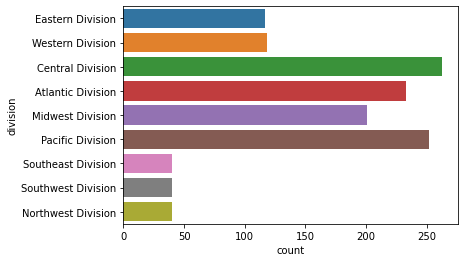

In [18]:
div_abbrev = abbrev[abbrev.abbrev_type=='Division']
div = nba.merge(div_abbrev,how='left',left_on='div_id',right_on='code')
div.drop(columns=['div_id','abbrev_type','code'],inplace=True)
div.rename(columns={'full_name':'division'},inplace=True)

sns.countplot(y='division',data=div);

The NBA is currently has 6 divisions (central, atlantic, pacific, southeast, southwest, and northwest) but we have 9 in our dataset.

- The Eastern and Western division existed until the 1970–71 NBA season when the NBA expanded from 14 to 17 teams and realigned into the Eastern and Western conferences with two divisions each


- The Midwest division was disbanded at the start of the 2004–05 season. It was replaced with two new divisions, the Southwest Division and the Northwest Division.

## How many NBA Winners are in the dataset?

**abbrev** holds the description of the **playoff** values

In [19]:
abbrev

,abbrev_type,code,full_name
0,Round,DF,Division Finals
1,Conference,EC,Eastern Conference
2,Conference,WC,Western Conference
3,Division,AT,Atlantic Division
4,Division,ED,Eastern Division
5,Division,CD,Central Division
6,Division,WD,Western Division
7,Division,SE,Southeast Division
8,Division,MW,Midwest Division
9,Division,NW,Northwest Division


In [20]:
winners = nba[nba.playoff=='NC']
len(winners)

65

## Which Franchise has won most NBA titles?

In [21]:
most_titles = winners.groupby('franch_id').playoff.count().sort_values(ascending=False)
most_titles.head()

franch_id
BOS    17
LAL    16
CHI     6
SAS     4
DET     3
Name: playoff, dtype: int64

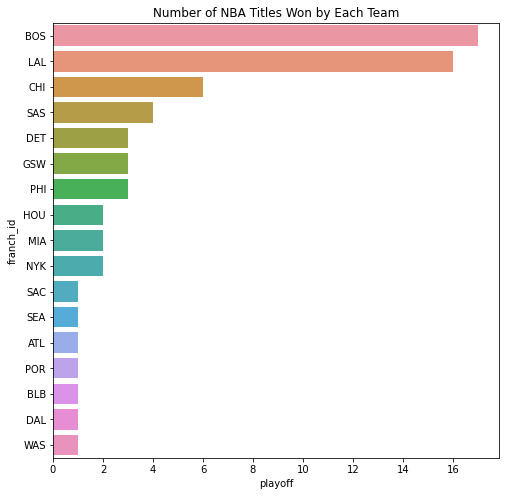

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(x=most_titles,y=most_titles.index)
plt.title('Number of NBA Titles Won by Each Team');

**Boston Celtics** and **Los Angeles Lakers** have won the NBA title 17 and 16 times respectively

## Which Conference has produced most NBA Champions?

In [23]:
most_titles = winners.groupby('conf_id').playoff.count().sort_values(ascending=False)
most_titles.head()

conf_id
WC    21
EC    20
Name: playoff, dtype: int64

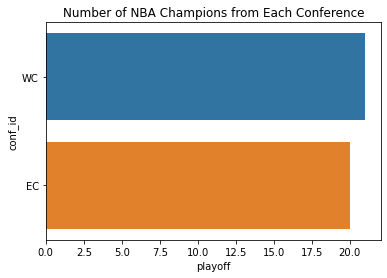

In [24]:
sns.barplot(x=most_titles,y=most_titles.index)
plt.title('Number of NBA Champions from Each Conference');

Up until 2011, The Western conference has produced most NBA champions (21)

## How often have teams attempted field goals over the years?

Since some teams played lesser games, we'll calculate the number of field goal attempts per game for each team

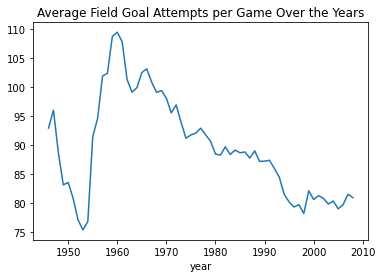

In [25]:
nba['fg_attempts_pg'] = nba['fg_attempts']/nba['games_played']
nba.groupby('year').fg_attempts_pg.mean().plot.line()
plt.title('Average Field Goal Attempts per Game Over the Years');

Generally, teams have been attempting fewer field goals as the years progressed

## How has shots conversion evolved over the years? 

We'll create another column, **fg%**.

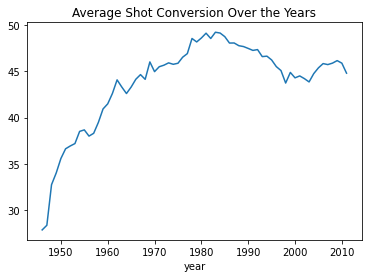

In [26]:
nba['fg%'] = nba['fg_made']*100/nba['fg_attempts']
nba.groupby('year')['fg%'].mean().plot.line()
plt.title('Average Shot Conversion Over the Years');

While the attempts at goal reduced, the shot accuracy have generally improved over the years

## How often have Free Throws been awarded over the Years?

A free throw, also known as foul shot, is an unguarded scoring attempt that refree awards a basketball player after an opposing team member commits a foul. It is worth one point

Not all teams played the same number of games. Let's create another column, **ft_attempts_pg**

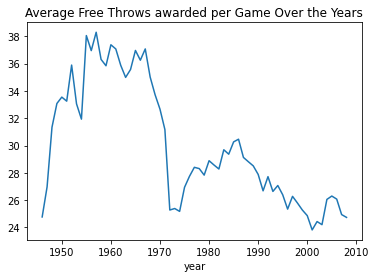

In [27]:
nba['ft_attempts_pg'] = nba['ft_attempts']/nba['games_played']
nba.groupby('year').ft_attempts_pg.mean().plot.line()
plt.title('Average Free Throws awarded per Game Over the Years');

A lot of free throws were awarded between 1950 and 1970. This has significantly reduced in recent years

## How often did teams convert their Free Throws

We'll create another column, **ft%**.

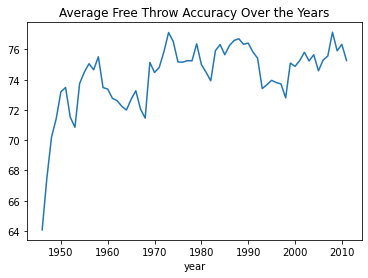

In [28]:
nba['ft%'] = nba['ft_made']*100/nba['ft_attempts']
nba.groupby('year')['ft%'].mean().plot.line()
plt.title('Average Free Throw Accuracy Over the Years');

Free Throws Conversion has slightly improved

## How often did teams attempt treys in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **treys_attempts_pg**

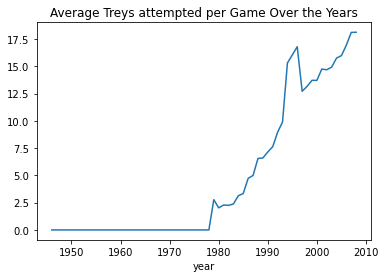

In [29]:
nba['treys_attempts_pg'] = nba['treys_attempts']/nba['games_played']
nba.groupby('year').treys_attempts_pg.mean().plot.line()
plt.title('Average Treys attempted per Game Over the Years');

There has been a marked improvement in the number of trey attempts per game over the years. However, There seems to be no trey attempts before 1980. This could be an entry error

## How often did teams convert their treys?

We'll create another column, **treys%**.

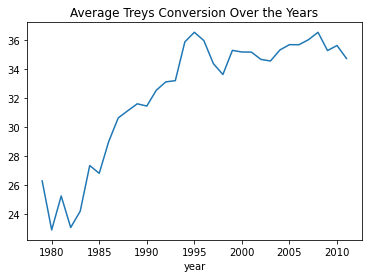

In [30]:
nba['treys%'] = nba['treys_made']*100/nba['treys_attempts']
nba.groupby('year')['treys%'].mean().plot.line()
plt.title('Average Treys Conversion Over the Years');

Treys conversion have improved over the years

## How Often did teams commit Personal Fouls?

Not all teams played the same number of games. Let's create another column, **fouls_pg**

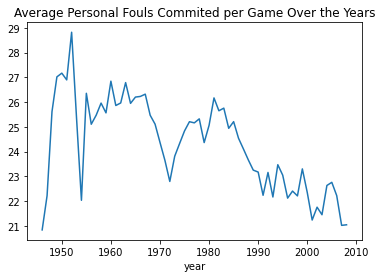

In [31]:
nba['fouls_pg'] = nba['fouls']/nba['games_played']
nba.groupby('year').fouls_pg.mean().plot.line()
plt.title('Average Personal Fouls Commited per Game Over the Years');

Personal Fouls have reduced as the league progressed. This explains why the number of free throws have reduced over the years

## Points per Game

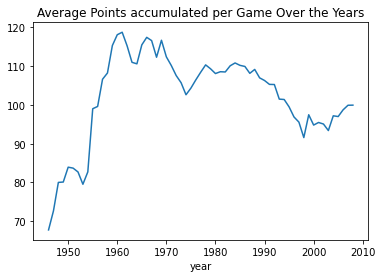

In [32]:
nba['points_pg'] = nba['points']/nba['games_played']
nba.groupby('year').points_pg.mean().plot.line()
plt.title('Average Points accumulated per Game Over the Years');

So far, we can observe that the play style in the NBA has evolved over time. Teams have been trying more field goals, committing fewer fouls, and improving their free throw conversion rate.

## Win Percentage

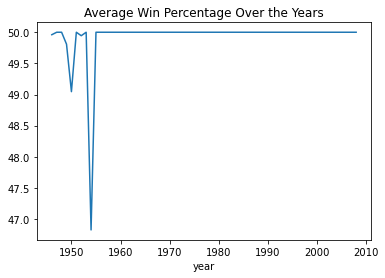

In [33]:
nba['win%'] = nba['tot_wins']*100/nba['games_played']
nba.groupby('year')['win%'].mean().plot.line()
plt.title('Average Win Percentage Over the Years');

## What factors contribute to a team's form in the NBA

In [34]:
nba['made_finals'] = ((nba.playoff=='F') | (nba.playoff=='NC')).astype(int)
abs(nba.corr()['made_finals']).sort_values(ascending=False)[:10]

made_finals    1.000000
win%           0.401885
tot_losses     0.392825
div_rank       0.382373
tot_wins       0.358340
div_wins       0.314183
conf_rank      0.304288
home_losses    0.298023
away_wins      0.290098
conf_losses    0.260313
Name: made_finals, dtype: float64

A team's performance is reflected in its wins, losses, and ranks.

# 4. Model Building and Evaluation

In [35]:
abbrev

,abbrev_type,code,full_name
0,Round,DF,Division Finals
1,Conference,EC,Eastern Conference
2,Conference,WC,Western Conference
3,Division,AT,Atlantic Division
4,Division,ED,Eastern Division
5,Division,CD,Central Division
6,Division,WD,Western Division
7,Division,SE,Southeast Division
8,Division,MW,Midwest Division
9,Division,NW,Northwest Division


In [36]:
# select playoffs teams
playoffs = nba_df[nba_df.playoff.notna()].reset_index(drop=True)

# create a new column to indicate if a team made the finals
playoffs['made_finals'] = ((playoffs.playoff=='F') | (playoffs.playoff=='NC')).astype(int)

# merge the corresponding abbreviations to their meanings
playoff_abbrev = abbrev[abbrev.abbrev_type=='Playoffs']
playoffs['playoff'] = playoffs.merge(playoff_abbrev,how='left',left_on='playoff',right_on='code')['full_name']

In [37]:
playoffs.shape

(767, 61)

In [38]:
# seperate features from target
X = playoffs.drop(columns=['lg_id','tm_id','franch_id','playoff','name','home_ground',
                           'bbtm_id','made_finals'])
y = playoffs['made_finals']

In [39]:
# create train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((575, 53), (192, 53))

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 357 to 102
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                575 non-null    int64  
 1   conf_id             452 non-null    object 
 2   div_id              575 non-null    object 
 3   div_rank            575 non-null    int64  
 4   conf_rank           575 non-null    int64  
 5   fg_made             575 non-null    int64  
 6   fg_attempts         575 non-null    int64  
 7   ft_made             575 non-null    int64  
 8   ft_attempts         575 non-null    int64  
 9   treys_made          575 non-null    int64  
 10  treys_attempts      575 non-null    int64  
 11  off_reb             575 non-null    int64  
 12  def_reb             575 non-null    int64  
 13  reb                 575 non-null    int64  
 14  assists             575 non-null    int64  
 15  fouls               575 non-null    int64  
 16  steals

**conf_id** and **mins_played** contain missing values. We can create another category, **missing** for **conf_id** and fill the missing values in **mins_played** with the median

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin

class Imputer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.conf_imputer = SimpleImputer(strategy='constant',fill_value='missing')
        self.mins_imputer = SimpleImputer(strategy='median')
    
    def fit(self,X,y=None):
        self.conf_imputer.fit(X['conf_id'].values.reshape(-1,1))
        self.mins_imputer.fit(X['mins_played'].values.reshape(-1,1))
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        df['conf_id'] = self.conf_imputer.transform(X['conf_id'].values.reshape(-1,1))
        df['mins_played'] = self.mins_imputer.transform(X['mins_played'].values.reshape(-1,1))
        return df

In [42]:
imputer = Imputer()
X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 357 to 102
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                575 non-null    int64  
 1   conf_id             575 non-null    object 
 2   div_id              575 non-null    object 
 3   div_rank            575 non-null    int64  
 4   conf_rank           575 non-null    int64  
 5   fg_made             575 non-null    int64  
 6   fg_attempts         575 non-null    int64  
 7   ft_made             575 non-null    int64  
 8   ft_attempts         575 non-null    int64  
 9   treys_made          575 non-null    int64  
 10  treys_attempts      575 non-null    int64  
 11  off_reb             575 non-null    int64  
 12  def_reb             575 non-null    int64  
 13  reb                 575 non-null    int64  
 14  assists             575 non-null    int64  
 15  fouls               575 non-null    int64  
 16  steals

Let's encode the categorical columns

In [43]:
X_train_imputed[['conf_id','div_id']].nunique()

conf_id    3
div_id     9
dtype: int64

In [44]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=['conf_id','div_id'])
X_train_imp_enc = encoder.fit_transform(X_train_imputed)

X_train_imp_enc

,year,conf_id_1,conf_id_2,conf_id_3,div_id_1,div_id_2,div_id_3,div_id_4,div_id_5,div_id_6,div_id_7,div_id_8,div_id_9,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
357,1986,1,0,0,1,0,0,0,0,0,0,0,0,3,5,3551,7412,1970,2526,116,364,1193,2351,3544,2083,2138,715,1354,321,9188,3615,7339,1995,155,460,2665,1249,2481,3730,2174,2052,688,1412,450,9380,0,0,25,16,17,24,0,0,32,28,17,13,0,42,40,82,19905.0,32767
73,1955,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2641,6437,2142,2829,0,0,0,0,4362,1886,1872,0,0,0,7424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7117,465,0,21,7,11,17,13,3,0,0,22,14,0,45,27,72,17355.0,32767
352,1986,0,0,1,0,0,1,0,0,0,0,0,0,1,1,3645,7051,1740,2153,207,565,933,2585,3518,2421,1710,561,1300,526,9237,3470,7500,1628,124,405,2148,1237,2287,3524,2060,1911,722,1156,338,8692,0,0,39,2,20,21,0,0,38,20,15,9,0,59,23,82,19805.0,32767
594,2001,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2845,6300,1478,1954,567,1509,810,2366,3176,1765,1695,648,1193,565,7735,2926,6546,1349,359,993,1787,991,2511,3502,1638,1874,651,1273,335,7560,0,0,26,15,24,17,0,0,38,16,20,8,0,50,32,82,19680.0,32767
145,1967,0,1,0,0,0,0,0,1,0,0,0,0,4,0,3488,8138,2006,2718,0,0,0,0,5117,1527,2130,0,0,0,8982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9310,660,0,11,22,12,23,6,8,0,0,11,29,0,29,53,82,19805.0,32767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1955,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2541,6543,2066,2627,0,0,0,0,4133,1689,1978,0,0,0,7148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7212,347,0,13,12,6,21,14,6,0,0,19,17,0,33,39,72,17355.0,32767
106,1961,0,1,0,0,1,0,0,0,0,0,0,0,1,0,3855,9109,1977,2715,0,0,0,0,6080,2049,1909,0,0,0,9687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8948,754,0,23,5,26,12,11,3,0,0,26,10,0,60,20,80,19275.0,32767
270,1980,1,0,0,0,0,0,0,0,1,0,0,0,2,6,3573,7335,1711,2223,21,118,1216,2347,3563,2099,1901,705,1451,390,8878,3617,7341,1568,49,171,2108,1177,2367,3544,2191,1977,689,1430,367,8851,0,0,25,16,15,26,0,0,32,28,19,11,0,40,42,82,19805.0,32767
435,1991,1,0,0,1,0,0,0,0,0,0,0,0,2,3,3767,7427,1944,2606,254,763,1137,2376,3513,2064,2049,854,1353,375,9732,3616,7507,1923,257,776,2563,1324,2436,3760,2122,2021,794,1512,435,9412,0,0,31,10,24,17,0,0,36,18,19,11,0,55,27,82,19880.0,32767


Let's bundle the preprocessing steps into a pipeline

In [45]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline([('imputer',imputer),('encoder',encoder)])
preprocessor.fit_transform(X_train)

,year,conf_id_1,conf_id_2,conf_id_3,div_id_1,div_id_2,div_id_3,div_id_4,div_id_5,div_id_6,div_id_7,div_id_8,div_id_9,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
357,1986,1,0,0,1,0,0,0,0,0,0,0,0,3,5,3551,7412,1970,2526,116,364,1193,2351,3544,2083,2138,715,1354,321,9188,3615,7339,1995,155,460,2665,1249,2481,3730,2174,2052,688,1412,450,9380,0,0,25,16,17,24,0,0,32,28,17,13,0,42,40,82,19905.0,32767
73,1955,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2641,6437,2142,2829,0,0,0,0,4362,1886,1872,0,0,0,7424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7117,465,0,21,7,11,17,13,3,0,0,22,14,0,45,27,72,17355.0,32767
352,1986,0,0,1,0,0,1,0,0,0,0,0,0,1,1,3645,7051,1740,2153,207,565,933,2585,3518,2421,1710,561,1300,526,9237,3470,7500,1628,124,405,2148,1237,2287,3524,2060,1911,722,1156,338,8692,0,0,39,2,20,21,0,0,38,20,15,9,0,59,23,82,19805.0,32767
594,2001,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2845,6300,1478,1954,567,1509,810,2366,3176,1765,1695,648,1193,565,7735,2926,6546,1349,359,993,1787,991,2511,3502,1638,1874,651,1273,335,7560,0,0,26,15,24,17,0,0,38,16,20,8,0,50,32,82,19680.0,32767
145,1967,0,1,0,0,0,0,0,1,0,0,0,0,4,0,3488,8138,2006,2718,0,0,0,0,5117,1527,2130,0,0,0,8982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9310,660,0,11,22,12,23,6,8,0,0,11,29,0,29,53,82,19805.0,32767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1955,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2541,6543,2066,2627,0,0,0,0,4133,1689,1978,0,0,0,7148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7212,347,0,13,12,6,21,14,6,0,0,19,17,0,33,39,72,17355.0,32767
106,1961,0,1,0,0,1,0,0,0,0,0,0,0,1,0,3855,9109,1977,2715,0,0,0,0,6080,2049,1909,0,0,0,9687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8948,754,0,23,5,26,12,11,3,0,0,26,10,0,60,20,80,19275.0,32767
270,1980,1,0,0,0,0,0,0,0,1,0,0,0,2,6,3573,7335,1711,2223,21,118,1216,2347,3563,2099,1901,705,1451,390,8878,3617,7341,1568,49,171,2108,1177,2367,3544,2191,1977,689,1430,367,8851,0,0,25,16,15,26,0,0,32,28,19,11,0,40,42,82,19805.0,32767
435,1991,1,0,0,1,0,0,0,0,0,0,0,0,2,3,3767,7427,1944,2606,254,763,1137,2376,3513,2064,2049,854,1353,375,9732,3616,7507,1923,257,776,2563,1324,2436,3760,2122,2021,794,1512,435,9412,0,0,31,10,24,17,0,0,36,18,19,11,0,55,27,82,19880.0,32767


Now we can train models on the preprocessed data

In [46]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
          RandomForestClassifier(random_state=42),
          ExtraTreesClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42,verbosity=0),
          LGBMClassifier(random_state=42),
         ]

## 4.1. Validation Results

In [47]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import cross_val_predict
model_preds = {}
for model in models:
    full_pipeline = Pipeline([('preprocessor',preprocessor),
                             ('model',model)])
    cv = cross_val_predict(full_pipeline,X_train,y_train,cv=3)
    model_preds[model.__class__.__name__]=cv
confusion_matrices = {model:confusion_matrix(y_train,preds) for model,preds in model_preds.items()}
results = pd.DataFrame()
results['Model'] = list(confusion_matrices.keys())
results[['TN','FP','FN','TP']] = [matrix.ravel() for matrix in list(confusion_matrices.values())]
results['Recall'] = results.TP*100/(results.TP+results.FN)
results['Precision'] = results.TP*100/(results.TP+results.FP)
results['TN Rate'] = results.TN*100/(results.TN+results.FP)
results['F1_Score'] =[ f1_score(y_train,preds) for preds in model_preds.values()]
results

,Model,TN,FP,FN,TP,Recall,Precision,TN Rate,F1_Score
0,RandomForestClassifier,460,21,77,17,18.085106,44.736842,95.634096,0.257576
1,ExtraTreesClassifier,461,20,72,22,23.404255,52.380952,95.841996,0.323529
2,GradientBoostingClassifier,443,38,67,27,28.723404,41.538462,92.099792,0.339623
3,AdaBoostClassifier,436,45,66,28,29.787234,38.356164,90.644491,0.335329
4,XGBClassifier,432,49,56,38,40.425532,43.678161,89.812890,0.419890
5,LGBMClassifier,439,42,63,31,32.978723,42.465753,91.268191,0.371257


The models perform poorly on the positive instances but do well in predicting the negative classes. This could be as a result of the class imbalance in the data

## 4.2. Balanced Classes

In [48]:
y_train.value_counts()

0    481
1     94
Name: made_finals, dtype: int64

In [49]:
# concatenate train features with target
train = pd.concat([X_train,y_train],axis=1)

# seperate negative from positive instances
train_0 = train[train.made_finals==0]
train_1 = train[train.made_finals==1]


# undersample the negative instances(majority class)
train_0_under = train_0.sample(frac=.25,random_state=42)

# concatenate the undersampled negative class and the positive class
train_bal = pd.concat([train_0_under,train_1])

# shuffle the instances and reset index
train_bal = train_bal.sample(frac=1,random_state=42).reset_index(drop=True)

# seperate features from target
X_train_bal = train_bal.drop(columns=['made_finals'])
y_train_bal = train_bal.made_finals

In [50]:
y_train_bal.value_counts()

0    120
1     94
Name: made_finals, dtype: int64

In [51]:
model_preds = {}
for model in models:
    full_pipeline = Pipeline([('preprocessor',preprocessor),
                             ('model',model)])
    cv = cross_val_predict(full_pipeline,X_train_bal,y_train_bal,cv=3)
    model_preds[model.__class__.__name__]=cv
confusion_matrices = {model:confusion_matrix(y_train_bal,preds) for model,preds in model_preds.items()}
results = pd.DataFrame()
results['Model'] = list(confusion_matrices.keys())
results[['TN','FP','FN','TP']] = [matrix.ravel() for matrix in list(confusion_matrices.values())]
results['Recall'] = results.TP*100/(results.TP+results.FN)
results['Precision'] = results.TP*100/(results.TP+results.FP)
results['TN Rate'] = results.TN*100/(results.TN+results.FP)
results['F1_Score'] =[ f1_score(y_train_bal,preds) for preds in model_preds.values()]
results

,Model,TN,FP,FN,TP,Recall,Precision,TN Rate,F1_Score
0,RandomForestClassifier,93,27,32,62,65.957447,69.662921,77.500000,0.677596
1,ExtraTreesClassifier,94,26,31,63,67.021277,70.786517,78.333333,0.688525
2,GradientBoostingClassifier,87,33,36,58,61.702128,63.736264,72.500000,0.627027
3,AdaBoostClassifier,85,35,35,59,62.765957,62.765957,70.833333,0.627660
4,XGBClassifier,91,29,36,58,61.702128,66.666667,75.833333,0.640884
5,LGBMClassifier,84,36,30,64,68.085106,64.000000,70.000000,0.659794


Overall, the results have improved. However, this trades off some performance on the negative cases in exchange for improved performance on the positive classes.


Let's see engineer new features and retrain the models

# 5. Feature Engineering

In [52]:
class Add_attrs(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        df = X.copy()
        df['fga_2pts'] = df['fg_attempts'] - df['treys_attempts']
        df['%fga_2pts'] = df['fga_2pts']/df['fg_attempts']
        df['fgm_2pts'] = df['fg_made'] - df['treys_made']
        df['%fgm_2pts'] = df['fgm_2pts']/df['fg_made']
        df['%fga_3pts'] = df['treys_attempts']/df['fg_attempts']
        df['%fgm_3pts'] = df['treys_made']/df['fg_made']
        df['%pts_2pts'] = 2*df['fgm_2pts']/df['points']
        df['%pts_3pts'] = 3*df['treys_made']/df['points']
        df['%pts_ft'] = 1*df['ft_made']/df['points']
        df['ast/to'] = df['assists']/df['turnovers']
        df['fg%'] = df['fg_made']/df['fg_attempts']
        df['dfg%'] = df['opp_fg_made']/df['opp_fg_attempts']
        df['diff%'] = df['fg%'] - df['dfg%']
        df['efg%'] = (df['fg_made'] + (0.5 * df['treys_made'])) / df['fg_attempts']
        df['ft%'] = df['ft_made']/df['ft_attempts']
        df['fta_rate'] = df['ft_attempts']/df['fg_attempts']
        df['pts%'] = df['points']/(df['ft_attempts']+2*df['fga_2pts']+3*df['treys_attempts'])
        df['ts%'] = df['points']/(2*(df['fg_attempts']+0.44*df['ft_attempts']))
        df['win%'] = df['tot_wins']/df['games_played']
        df['opp_fga_2pts'] = df['opp_fg_attempts'] - df['opp_treys_attempts']
        df['opp_%fga_2pts'] = df['opp_fga_2pts']/df['opp_fg_attempts']
        df['opp_fgm_2pts'] = df['opp_fg_made'] - df['opp_treys_made']
        df['opp_%fgm_2pts'] = df['opp_fgm_2pts']/df['opp_fg_made']
        df['opp_%fga_3pts'] = df['opp_treys_attempts']/df['opp_fg_attempts']
        df['opp_%fgm_3pts'] = df['opp_treys_made']/df['opp_fg_made']
        df['opp_%pts_2pts'] = 2*df['opp_fgm_2pts']/df['opp_points']
        df['opp_%pts_3pts'] = 3*df['opp_treys_made']/df['opp_points']
        df['opp_%pts_ft'] = 1*df['opp_ft_made']/df['opp_points']
        df['opp_ast/to'] = df['opp_assists']/df['opp_turnovers']
        df['opp_fg%'] = df['opp_fg_made']/df['opp_fg_attempts']
        df['opp_efg%'] = (df['opp_fg_made'] + (0.5 * df['opp_treys_made'])) / df['opp_fg_attempts']
        df['opp_ft%'] = df['opp_ft_made']/df['opp_ft_attempts']
        df['opp_fta_rate'] = df['opp_ft_attempts']/df['opp_fg_attempts']
        df['opp_pts%'] = df['opp_points']/(df['opp_ft_attempts']+2*df['opp_fga_2pts']+3*df['opp_treys_attempts'])
        df['opp_ts%'] = df['opp_points']/(2*(df['opp_fg_attempts']+0.44*df['opp_ft_attempts']))
        return df

The feature engineering process would involve some zero divisions. Let's create a custom class to handle missing and infinity values

In [53]:
class Fill_nans(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        self.medians = X.median()
        return self
    def transform(self,X,y=None):
        df = X.copy()
        df.replace(np.nan,self.medians,inplace=True)
        return df.replace(np.inf,self.medians)

In [54]:
preprocessor = Pipeline([('imputer',imputer),
                         ('attr_adder',Add_attrs()),
                         ('filler', Fill_nans()),
                         ('encoder',encoder)])
X_train_bal_prep = preprocessor.fit_transform(X_train_bal)
X_train_bal_prep

,year,conf_id_1,conf_id_2,conf_id_3,div_id_1,div_id_2,div_id_3,div_id_4,div_id_5,div_id_6,div_id_7,div_id_8,div_id_9,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,...,tot_wins,tot_losses,games_played,mins_played,attendance,fga_2pts,%fga_2pts,fgm_2pts,%fgm_2pts,%fga_3pts,%fgm_3pts,%pts_2pts,%pts_3pts,%pts_ft,ast/to,fg%,dfg%,diff%,efg%,ft%,fta_rate,pts%,ts%,win%,opp_fga_2pts,opp_%fga_2pts,opp_fgm_2pts,opp_%fgm_2pts,opp_%fga_3pts,opp_%fgm_3pts,opp_%pts_2pts,opp_%pts_3pts,opp_%pts_ft,opp_ast/to,opp_fg%,opp_efg%,opp_ft%,opp_fta_rate,opp_pts%,opp_ts%
0,1995,1,0,0,1,0,0,0,0,0,0,0,0,2,3,3129,6417,1769,2302,377,1013,993,2373,3366,2139,2046,667,1215,418,8404,2747,6174,1820,550,1428,2422,936,2149,3085,1640,...,55,27,82,19780.0,32767,5404,0.842138,2752,0.879514,0.157862,0.120486,0.654926,0.134579,0.210495,1.760494,0.487611,0.444930,0.042681,0.516986,0.768462,0.358735,0.520404,0.565554,0.670732,3752,0.607710,1319,0.480160,0.392290,0.519840,0.335453,0.544761,0.231434,1.277259,0.444930,0.560577,3.309091,0.089083,0.513316,0.612843
1,1959,0,1,0,0,1,0,0,0,0,0,0,0,1,0,3179,7580,2148,2885,0,0,0,0,5343,1881,1995,0,0,0,8506,0,0,0,0,0,0,0,0,0,0,...,46,29,75,18100.0,32767,7580,1.000000,3179,1.000000,0.000000,0.000000,0.747472,0.000000,0.252528,1.608356,0.419393,0.455022,0.018608,0.419393,0.744541,0.380607,0.471377,0.480598,0.613333,0,0.697595,0,0.808243,0.302405,0.191757,0.000000,0.000000,0.000000,1.409903,0.455022,0.504716,6.656126,0.034235,0.509791,0.588879
2,2008,0,0,1,0,0,1,0,0,0,0,0,0,2,6,2997,6532,1652,2216,341,1072,1039,2336,3375,1647,1650,658,1157,415,7987,2997,6489,1402,585,1595,1792,935,2285,3220,1799,...,41,41,82,19755.0,32767,5460,0.835885,2656,0.886220,0.164115,0.113780,0.665081,0.128083,0.206836,1.423509,0.458818,0.461859,-0.003040,0.484920,0.745487,0.339253,0.488442,0.531967,0.500000,4697,0.723840,1402,0.467801,0.276160,0.532199,0.351334,0.599549,0.175667,1.407668,0.461859,0.584759,2.396581,0.090153,0.519766,0.591501
3,2003,1,0,0,0,0,0,1,0,0,0,0,0,1,2,3028,6676,1631,2352,365,1115,1001,2535,3536,1948,1732,682,1132,379,8052,2920,6640,1472,420,1247,1964,922,2558,3480,1708,...,56,26,82,19855.0,32767,5561,0.832984,2663,0.879458,0.167016,0.120542,0.661451,0.135991,0.202558,1.720848,0.453565,0.439759,0.013806,0.480902,0.693452,0.352307,0.478744,0.522119,0.682927,4676,0.704217,1673,0.572945,0.295783,0.427055,0.432747,0.483833,0.190378,1.362041,0.439759,0.533660,3.504762,0.063253,0.493616,0.566463
4,2010,1,0,0,0,0,0,0,1,0,0,0,0,4,0,3200,6801,1486,1981,309,926,970,2391,3361,1691,1705,771,1145,441,8195,2967,6489,1482,1948,587,1592,905,2387,3292,1724,...,46,36,0,19780.0,0,5875,0.863844,2891,0.903438,0.136156,0.096562,0.705552,0.113118,0.181330,1.476856,0.470519,0.457235,0.013284,0.493236,0.750126,0.291281,0.496396,0.534040,0.634146,4897,0.754662,2380,0.802157,0.245338,0.197843,0.594777,0.220042,0.185181,1.261156,0.457235,0.502466,0.760780,0.300200,0.484502,0.544709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1989,0,0,1,0,0,0,0,0,0,1,0,0,2,3,3531,7090,1665,2140,250,669,1075,2279,3354,2172,1906,814,1247,388,8977,3361,6819,1784,204,581,2392,1068,2296,3364,2110,...,55,27,82,19830.0,32767,6421,0.905642,3281,0.929199,0.094358,0.070801,0.730979,0.083547,0.185474,1.741780,0.498025,0.492888,0.005138,0.515656,0.778037,0.301834,0.528401,0.558855,0.670732,4427,0.649215,2780,0.827135,0.350785,0.172865,0.638347,0.200115,0.204822,1.495393,0.492888,0.535489,8.745098,0.029916,0.536528,0.630359
210,2007,0,0,1,0,0,0,0,0,0,0,0,1,2,5,2986,6695,1557,199

In [55]:
model_preds = {}
for model in models:
    full_pipeline = Pipeline([('preprocessor',preprocessor),
                             ('model',model)])
    cv = cross_val_predict(full_pipeline,X_train_bal,y_train_bal,cv=3)
    model_preds[model.__class__.__name__]=cv
confusion_matrices = {model:confusion_matrix(y_train_bal,preds) for model,preds in model_preds.items()}
results = pd.DataFrame()
results['Model'] = list(confusion_matrices.keys())
results[['TN','FP','FN','TP']] = [matrix.ravel() for matrix in list(confusion_matrices.values())]
results['Recall'] = results.TP*100/(results.TP+results.FN)
results['Precision'] = results.TP*100/(results.TP+results.FP)
results['TN Rate'] = results.TN*100/(results.TN+results.FP)
results['F1_Score'] =[ f1_score(y_train_bal,preds) for preds in model_preds.values()]
results

,Model,TN,FP,FN,TP,Recall,Precision,TN Rate,F1_Score
0,RandomForestClassifier,97,23,40,54,57.446809,70.129870,80.833333,0.631579
1,ExtraTreesClassifier,92,28,30,64,68.085106,69.565217,76.666667,0.688172
2,GradientBoostingClassifier,89,31,34,60,63.829787,65.934066,74.166667,0.648649
3,AdaBoostClassifier,89,31,32,62,65.957447,66.666667,74.166667,0.663102
4,XGBClassifier,88,32,27,67,71.276596,67.676768,73.333333,0.694301
5,LGBMClassifier,87,33,30,64,68.085106,65.979381,72.500000,0.670157


There isn't much improvement with feature engineering but the models now have very similar performances

Let's inspect the most important features from **XGBClassifier**

# 6. Feature Importance

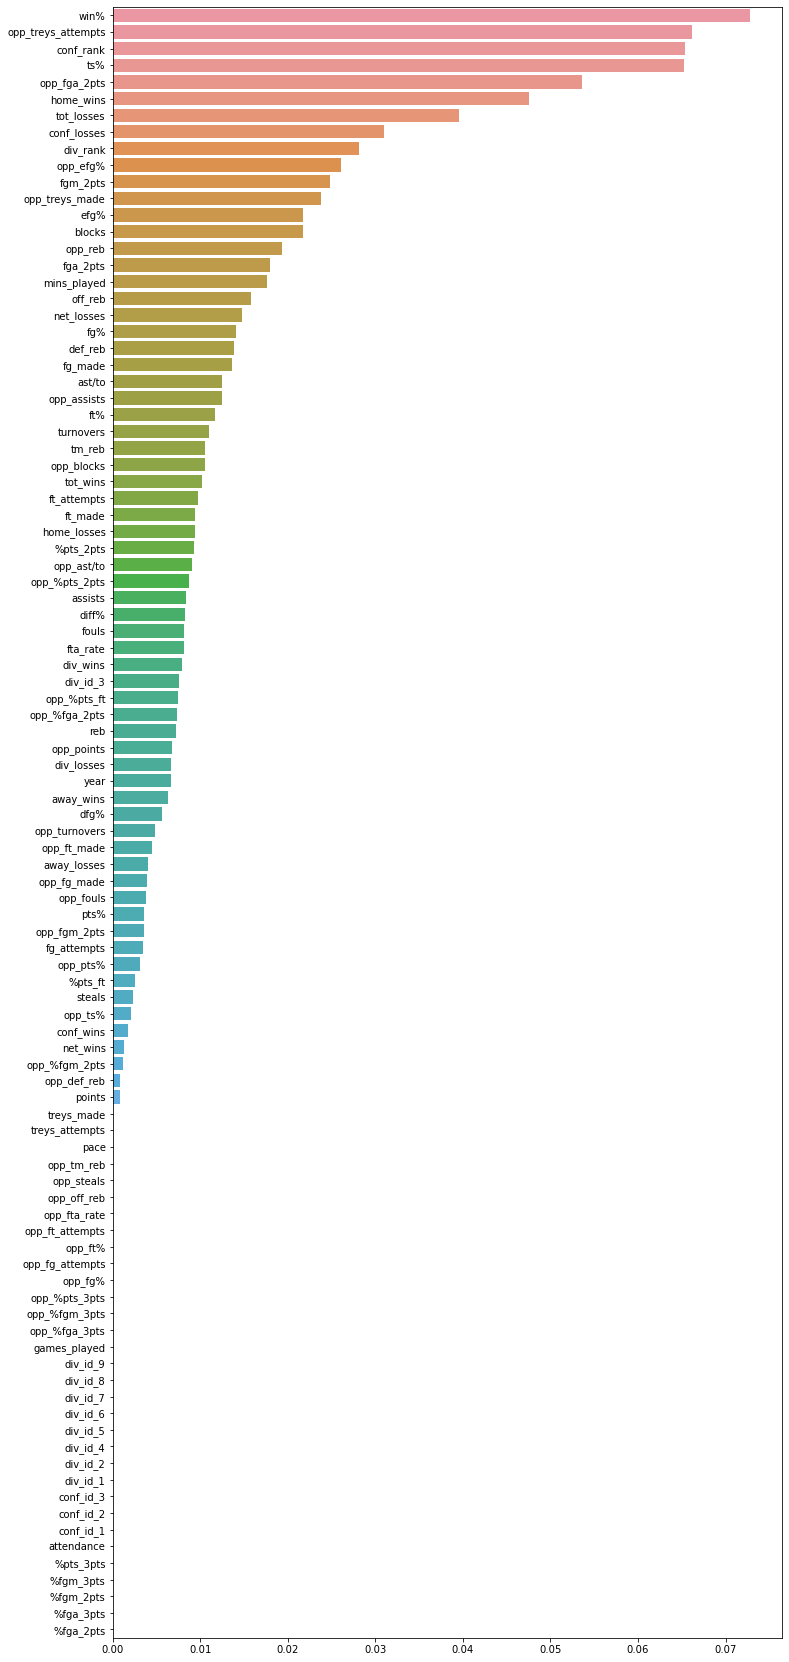

In [56]:
model = XGBClassifier(random_state=42)
pipeline = Pipeline([('preprocessor',preprocessor),
                             ('model',model)])
pipeline.fit(X_train_bal,y_train_bal)
imps = pipeline.named_steps.model.feature_importances_
feat_names = preprocessor.fit_transform(X_train).columns
importances = sorted(zip(imps,feat_names),reverse=True)
x_axis = [imp[0] for imp in importances]
y_axis = [imp[1] for imp in importances]
plt.figure(figsize=(12,30))
sns.barplot(x_axis,y_axis);

Unsuprisingly, **win%** is a very important feature. We can also see that a handful of the engineered features are informative. Let's see how **win%** and **opp_treys_attempts** affect a team's form

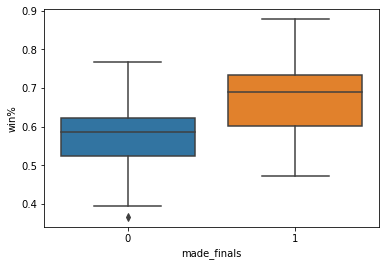

In [57]:
X_train_prep = preprocessor.transform(X_train_bal)
sns.boxplot(y=X_train_prep['win%'],x=y_train_bal);

On an average, teams with high win ratio are more likely to make the playoffs finals

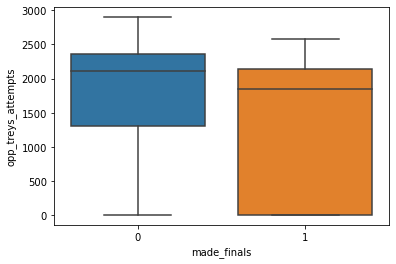

In [58]:
X_train_prep = preprocessor.transform(X_train_bal)
sns.boxplot(y=X_train_prep['opp_treys_attempts'],x=y_train_bal);

On an average, teams that make it to the finals prevent their opponents from trying too many trey shots

# 7. Test Results

In [59]:
model_preds = {}
for model in models:
    full_pipeline = Pipeline([('preprocessor',preprocessor),
                             ('model',model)])
    full_pipeline.fit(X_train_bal,y_train_bal)
    preds = full_pipeline.predict(X_test)
    model_preds[model.__class__.__name__]=preds
confusion_matrices = {model:confusion_matrix(y_test,preds) for model,preds in model_preds.items()}
results = pd.DataFrame()
results['Model'] = list(confusion_matrices.keys())
results[['TN','FP','FN','TP']] = [matrix.ravel() for matrix in list(confusion_matrices.values())]
results['Recall'] = results.TP*100/(results.TP+results.FN)
results['Precision'] = results.TP*100/(results.TP+results.FP)
results['TN Rate'] = results.TN*100/(results.TN+results.FP)
results['F1_Score'] =[ f1_score(y_test,preds) for preds in model_preds.values()]
results

,Model,TN,FP,FN,TP,Recall,Precision,TN Rate,F1_Score
0,RandomForestClassifier,132,23,12,25,67.567568,52.083333,85.161290,0.588235
1,ExtraTreesClassifier,121,34,11,26,70.270270,43.333333,78.064516,0.536082
2,GradientBoostingClassifier,127,28,11,26,70.270270,48.148148,81.935484,0.571429
3,AdaBoostClassifier,125,30,11,26,70.270270,46.428571,80.645161,0.559140
4,XGBClassifier,131,24,10,27,72.972973,52.941176,84.516129,0.613636
5,LGBMClassifier,132,23,9,28,75.675676,54.901961,85.161290,0.636364


- The test results are not too far off the validation results.
- Most of the models capture at least 70 percent and 80 percent of the positive and negative classes respectively. However they struggle to distinguish between these classes thus the low precision

# 8. Conclusion

While there may be other indicators that represent a team's form, the regular season victories, losses, and opponents' performance are useful in projecting how far a basketball team can go in the NBA playoffs.

# 9. References

Wikipedia, 2022, _Basketball_, viewed 17 February 2022,
	<https://en.wikipedia.org/wiki/Basketball>


NBA, _NBA Advanced Stats_, viewed 18 February 2022,
	<https://www.nba.com/stats/help/glossary/>


MasterClass, 2021, _How Long Are Basketball Games? NBA, WNBA, and NCAA Rules_, viewed 21 February 2021,
	<https://www.masterclass.com/articles/how-long-are-basketball-games#how-long-are-basketball-games>
